# Episode 21. Time Series Forecasting with MLP
The task of the program is to predict the future GDP value based on the historical data 

## Import Libraries

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# set up inline plotting
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10

## Data

In [2]:
# Original Data Source: https://fred.stlouisfed.org/series/RSXFSN
from google.colab import files
uploaded = files.upload()

Saving RSXFSN.csv to RSXFSN.csv


In [3]:
# Store data in DataFrame
df = pd.read_csv("RSXFSN.csv")

In [4]:
# keep real GDP only
keep_columns = ['RSXFSN']
df = df[keep_columns]
# rescale
df = df/10000

## Data Preprocessing

In [5]:
# split train & test data
n_train = int(len(df) * 0.8)
n_test = len(df) - n_train
train, test = df.iloc[0:n_train], df.iloc[n_train:len(df)]
print(len(train), len(test))

300 75


In [6]:
# convert the input data into time series format
def get_timeseries(x, n_steps=1):
    x_ts, y_ts = [], []
    for ii in range(len(x) - n_steps):
        v = x.iloc[ii:(ii + n_steps)].values
        x_ts.append(v)
        w = x.iloc[ii + n_steps].values
        y_ts.append(w)
    return np.array(x_ts), np.array(y_ts)

In [7]:
# set number of time steps and features
n_steps = 16 # use past 16 time steps to predict the next month
n_features = 1 # the feature is retail sales

# convert to a time series dimension: [samples, n_steps, n_features]

# transfrom into time series format
x_train, y_train = get_timeseries(train, n_steps)
x_test, y_test = get_timeseries(test,n_steps)

print(x_train.shape, y_train.shape)

(284, 16, 1) (284, 1)


## Modeling

In [8]:
# define model
model = Sequential()
# 50 nodes with relu activation function
model.add(Dense(50, activation='relu', input_dim=n_steps))
# 1 output
model.add(Dense(1))
# use Adam algorithm to optimize with 0.001 learning rate
model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

## Training

In [9]:
# fit model
history = model.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 31ms/step - loss: 2347.3826 - val_loss: 2974.2891
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 837.7810 - val_loss: 882.6735
Epoch 3/500
8/8 [==============================] - 0s 6ms/step - loss: 191.5780 - val_loss: 122.7849
Epoch 4/500
8/8 [==============================] - 0s 6ms/step - loss: 16.9611 - val_loss: 10.2601
Epoch 5/500
8/8 [==============================] - 0s 6ms/step - loss: 15.6736 - val_loss: 45.7016
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 25.1722 - val_loss: 46.2098
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 16.6101 - val_loss: 22.9649
Epoch 8/500
8/8 [==============================] - 0s 5ms/step - loss: 7.4047 - val_loss: 10.3153
Epoch 9/500
8/8 [==============================] - 0s 9ms/step - loss: 5.0440 - val_loss: 9.2253
Epoch 10/500
8/8 [==============================] - 0s 6ms/step - loss: 5.4643 - val_loss: 9.8306
Epoch

## Evaluation

In [10]:
# predict result based on x_test
y_pred = model.predict(x_test)

2/2 [==============================] - 0s 4ms/step


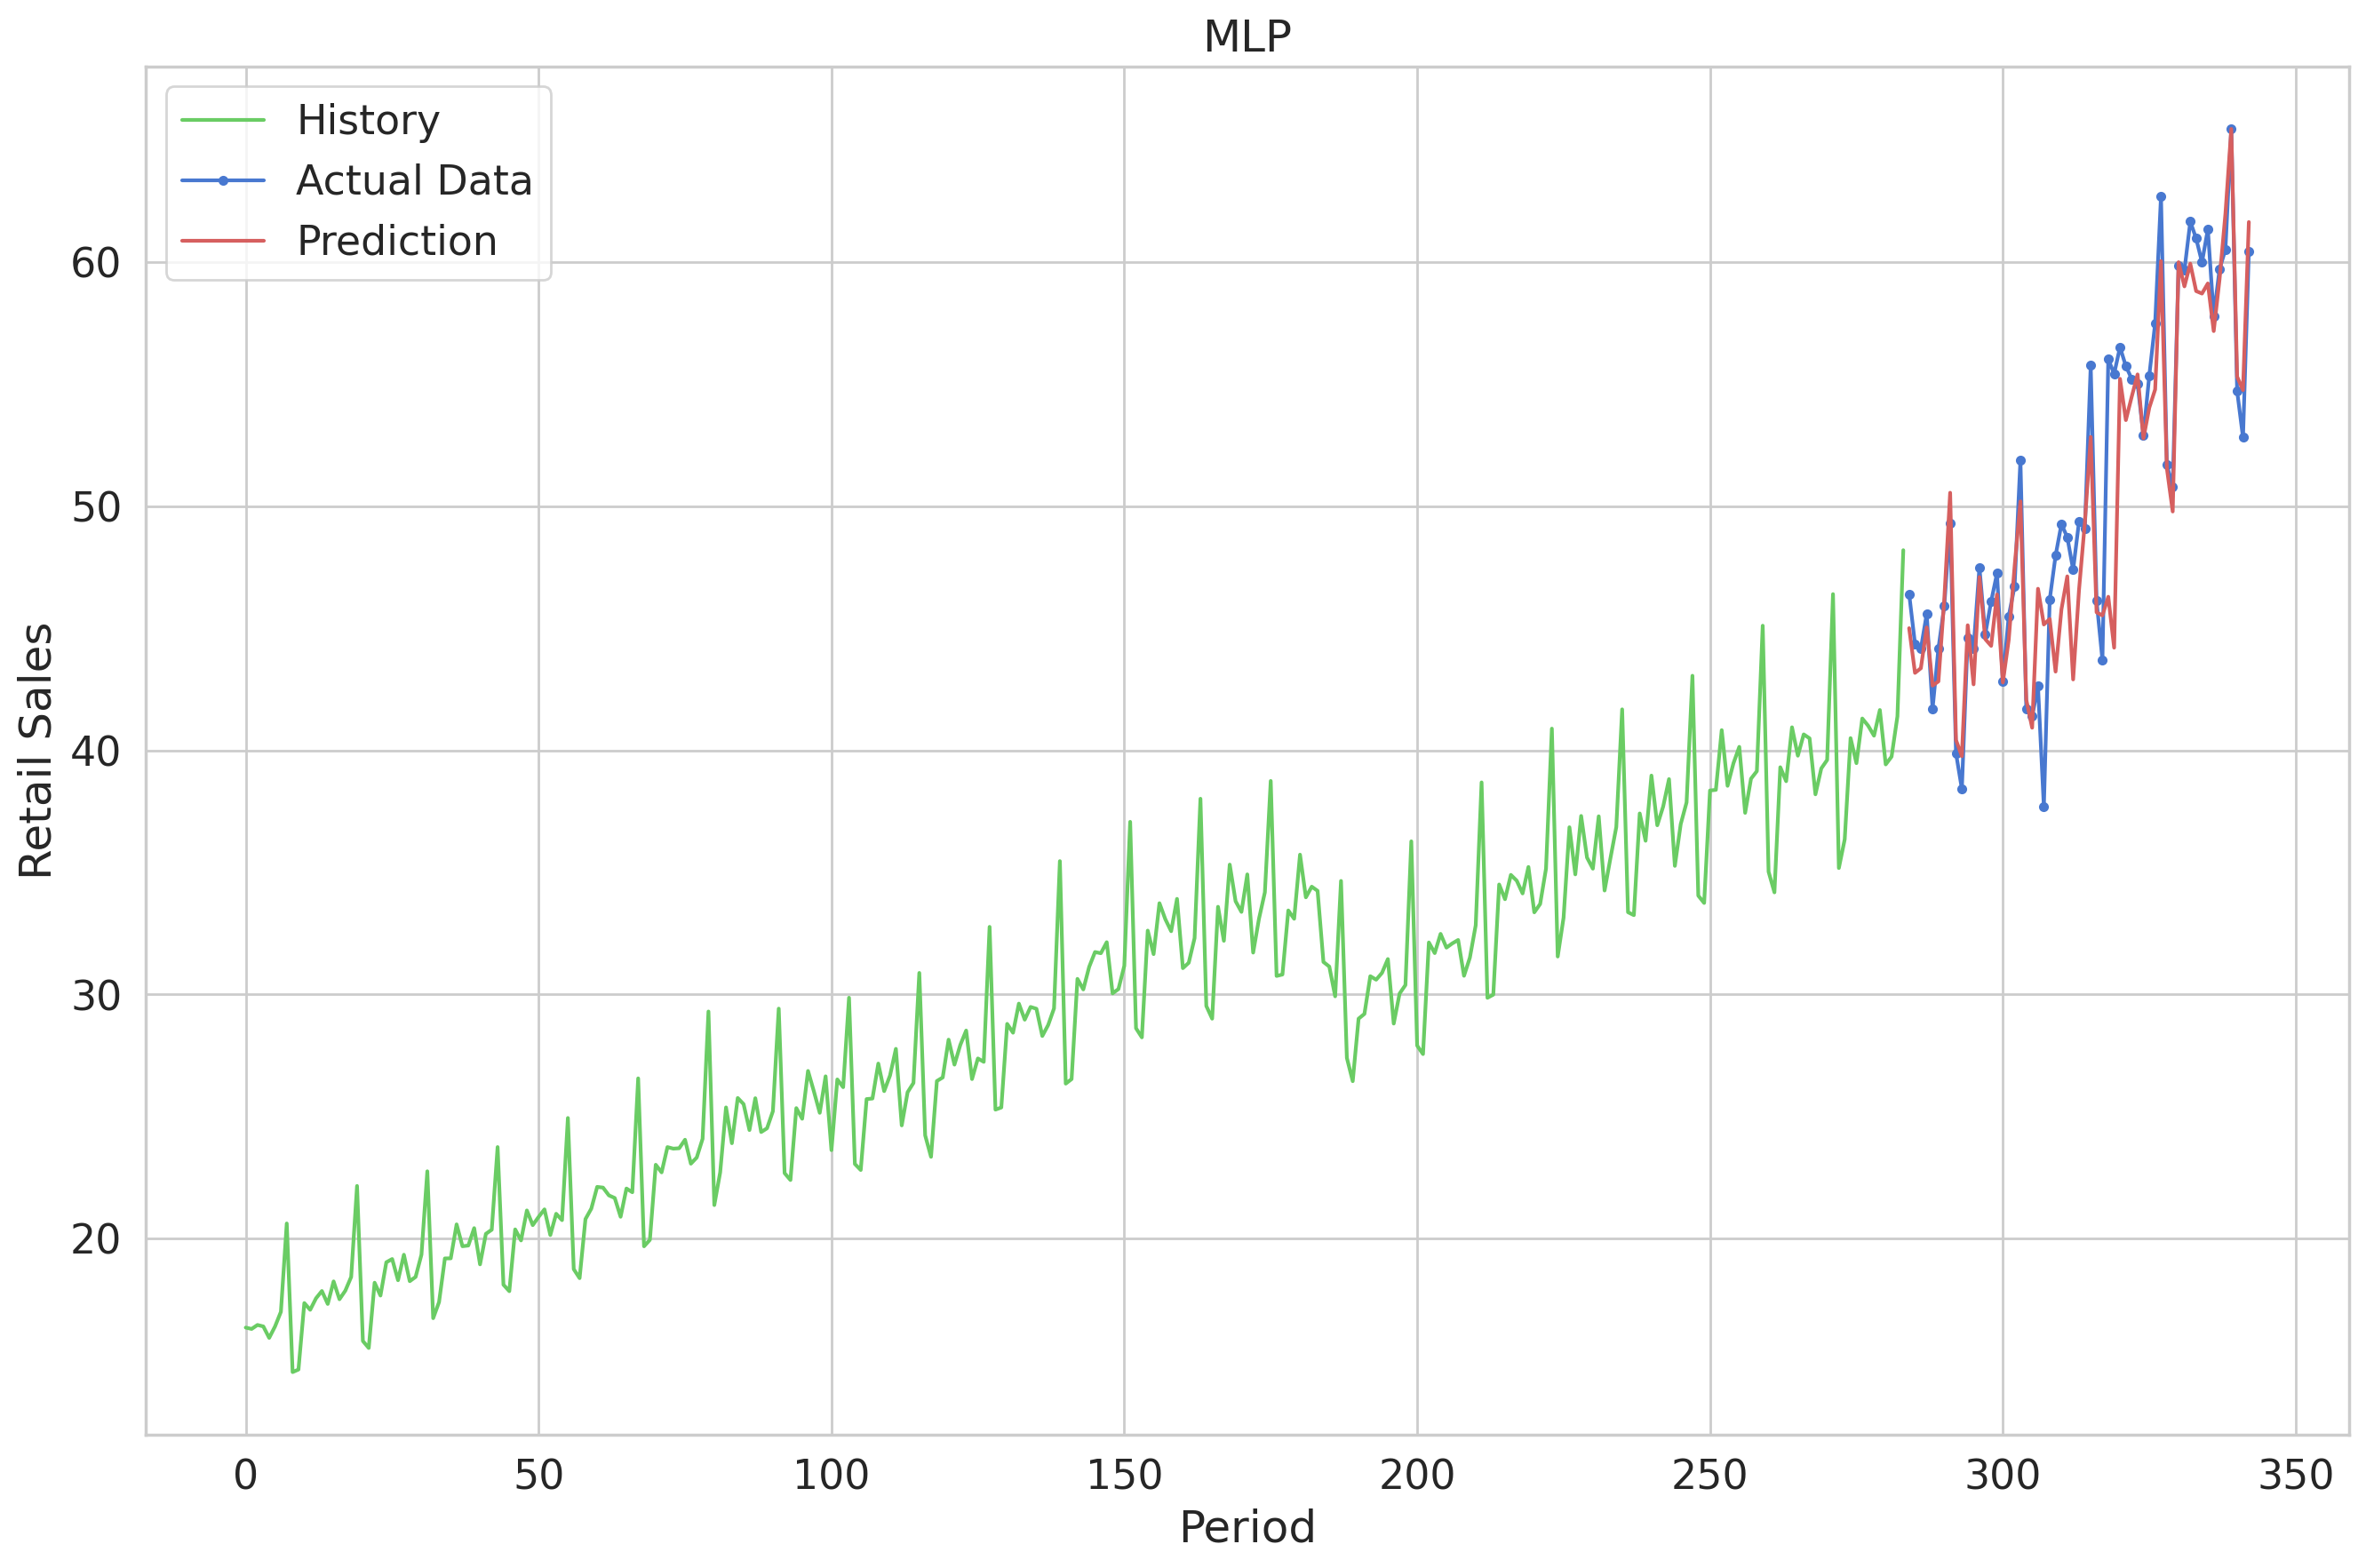

In [54]:
# plot
plt.title('MLP')
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

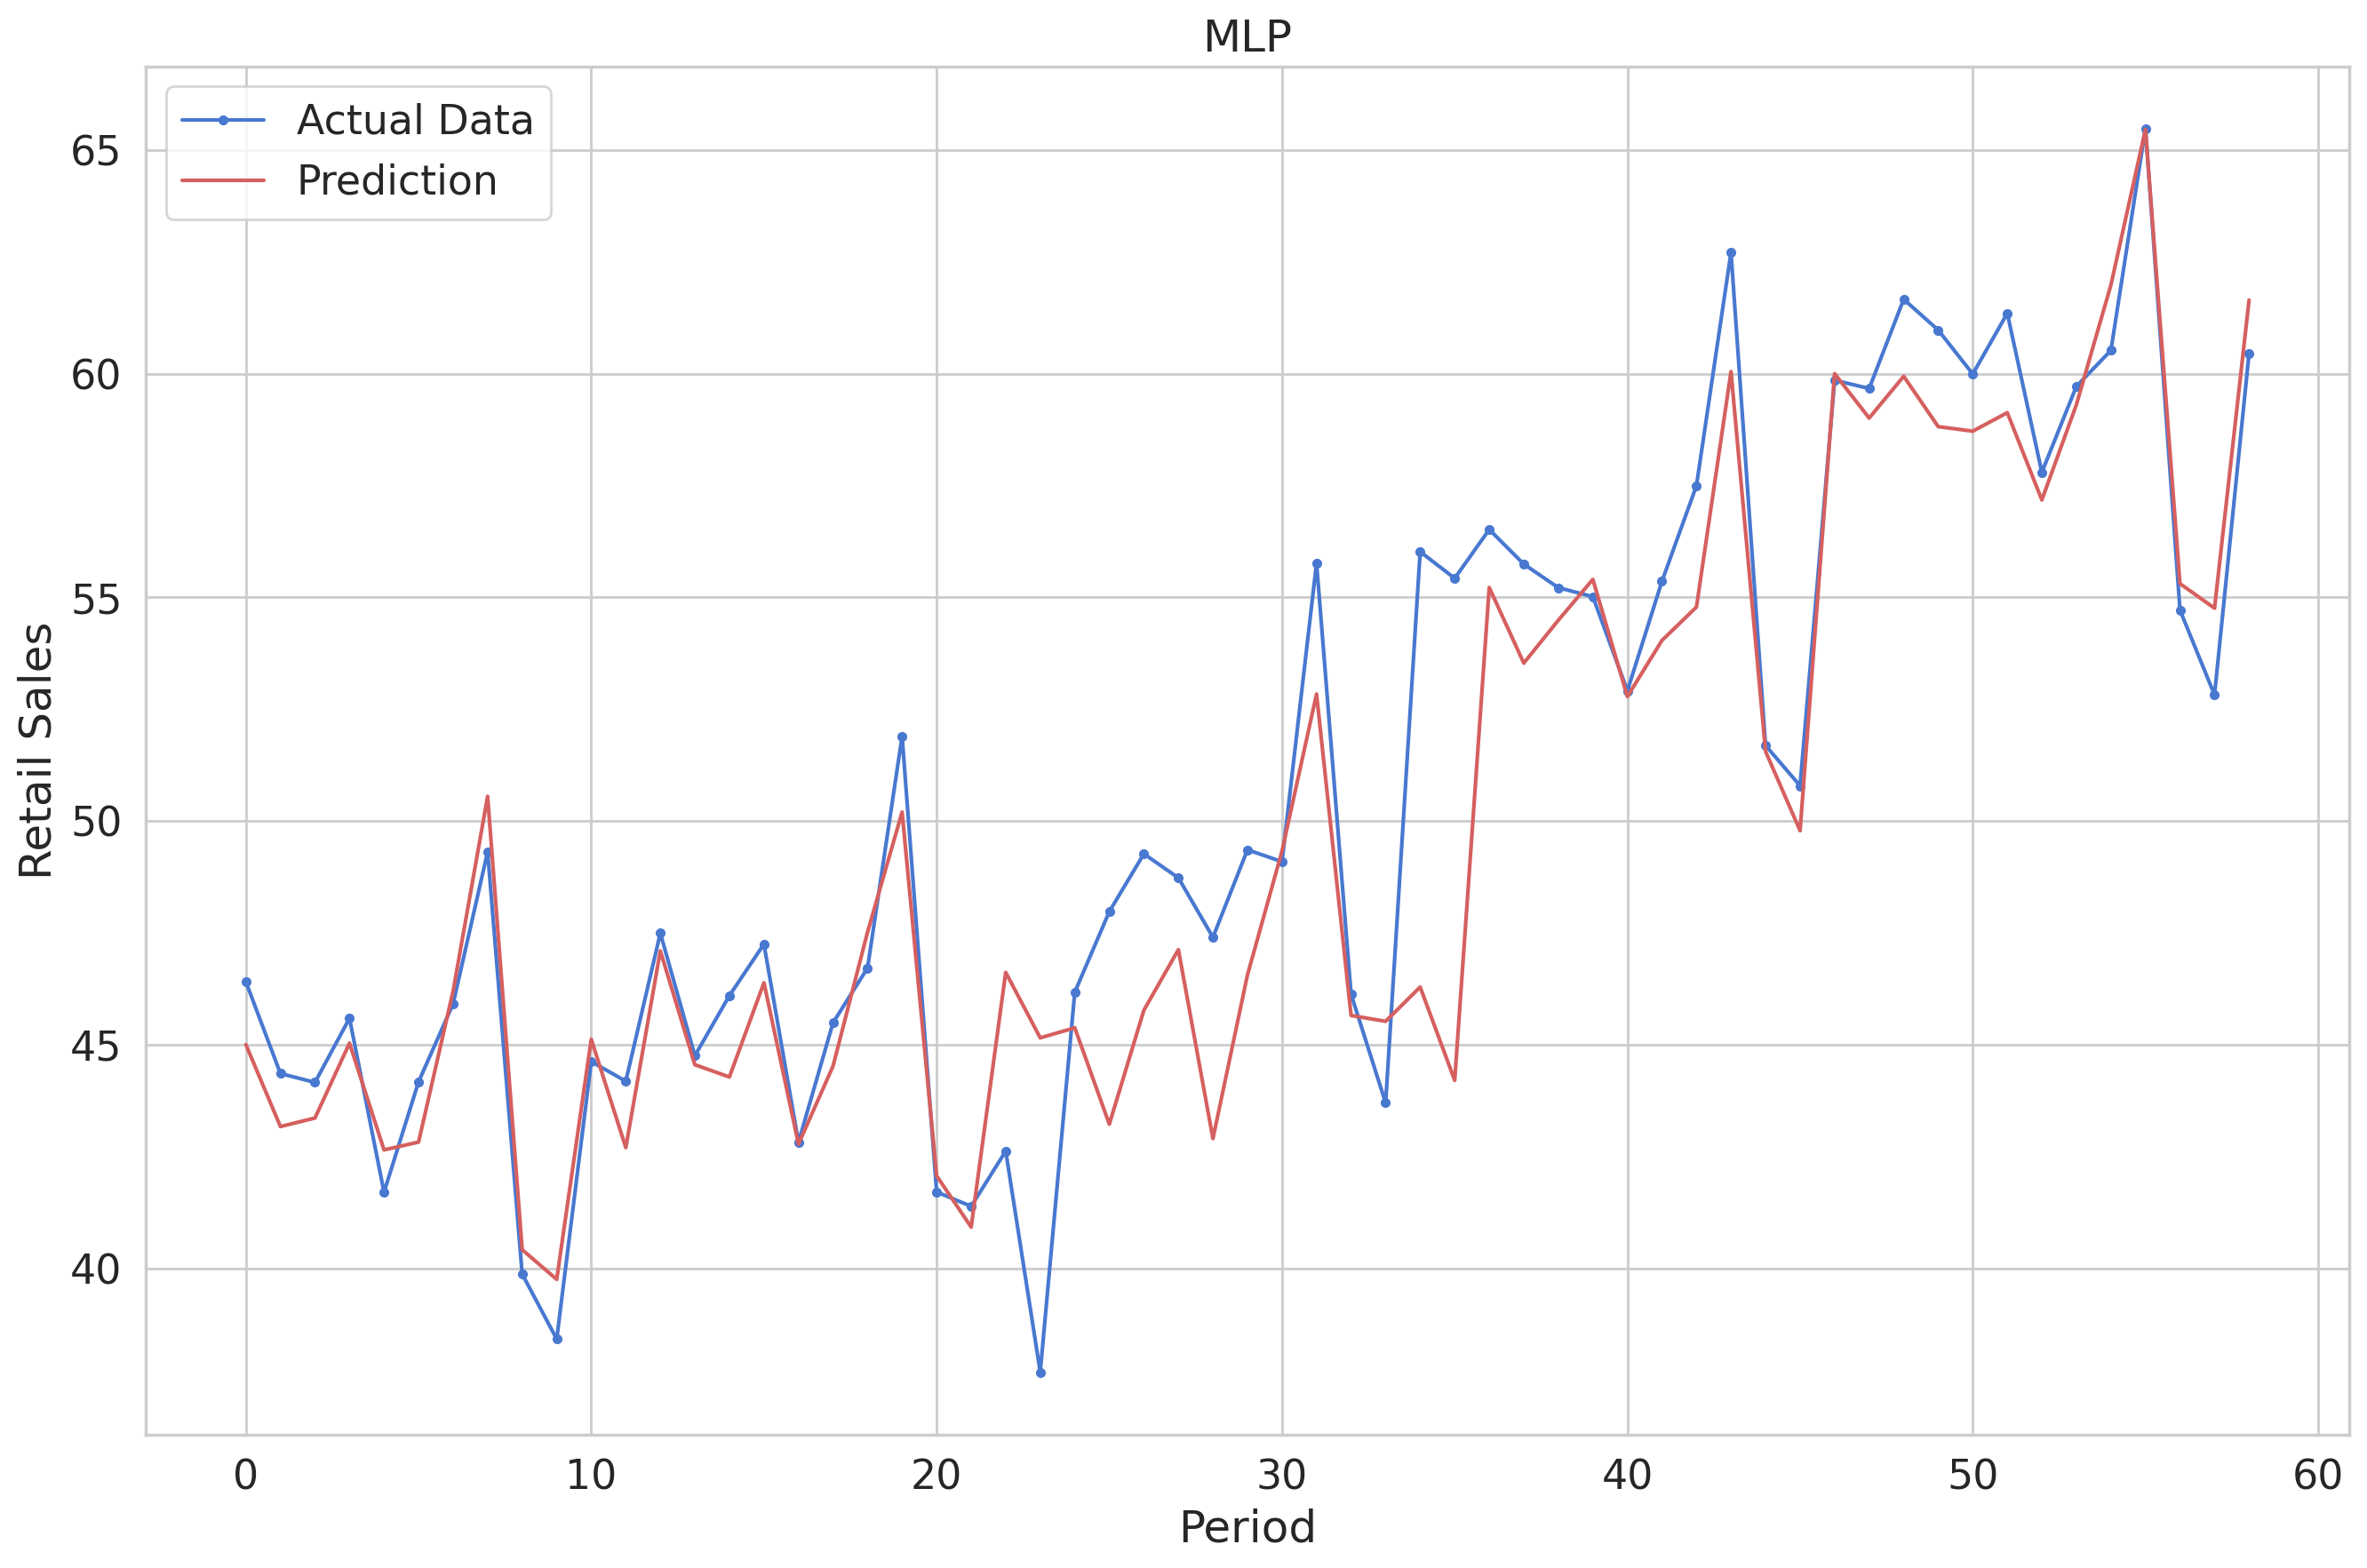

In [53]:
# plot
plt.title('MLP')
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.legend()
plt.show();

## Replace MLP with 1-dimensional CNN

In [43]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D
model1 = Sequential()
# 1D convolutional layer with 64 filters, kernel size of 3, relu activation function
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_steps, n_features)))
# I tried to add a 1d maxpooling layer, but the performance is worse than the 1d CNN without it
# model1.add(MaxPooling1D(pool_size=2))
# flatten the output 
model1.add(Flatten())
# fully connected layer with 50 neurons with relu activation function
model1.add(Dense(50, activation='relu'))
# 1 neuron in the output layer
model1.add(Dense(1))


In [44]:
# loss is MSE and use the Adam algorithm to optimize(learning rate=0.001)
model1.compile(loss='mean_squared_error', optimizer=Adam(0.001))

In [45]:
# fit model
# train the model using the training data, with 500 epochs, a batch size of 32, and a validation split of 10%
history1 = model1.fit(x_train, y_train,epochs=500,batch_size=32,validation_split=0.1,verbose=1,shuffle=False)

Epoch 1/500
8/8 [==============================] - 1s 25ms/step - loss: 124.8148 - val_loss: 97.2341
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 42.5544 - val_loss: 8.8910
Epoch 3/500
8/8 [==============================] - 0s 9ms/step - loss: 29.1962 - val_loss: 35.5190
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 9.9723 - val_loss: 22.3507
Epoch 5/500
8/8 [==============================] - 0s 8ms/step - loss: 6.8852 - val_loss: 8.9099
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 6.8041 - val_loss: 8.9491
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 5.8306 - val_loss: 9.1267
Epoch 8/500
8/8 [==============================] - 0s 8ms/step - loss: 4.6691 - val_loss: 8.2909
Epoch 9/500
8/8 [==============================] - 0s 8ms/step - loss: 4.7274 - val_loss: 7.7244
Epoch 10/500
8/8 [==============================] - 0s 7ms/step - loss: 4.5590 - val_loss: 7.4781
Epoch 11/500
8/8 [===

In [46]:
# predict the data based on the x_test 
y_pred1 = model1.predict(x_test)

2/2 [==============================] - 0s 5ms/step


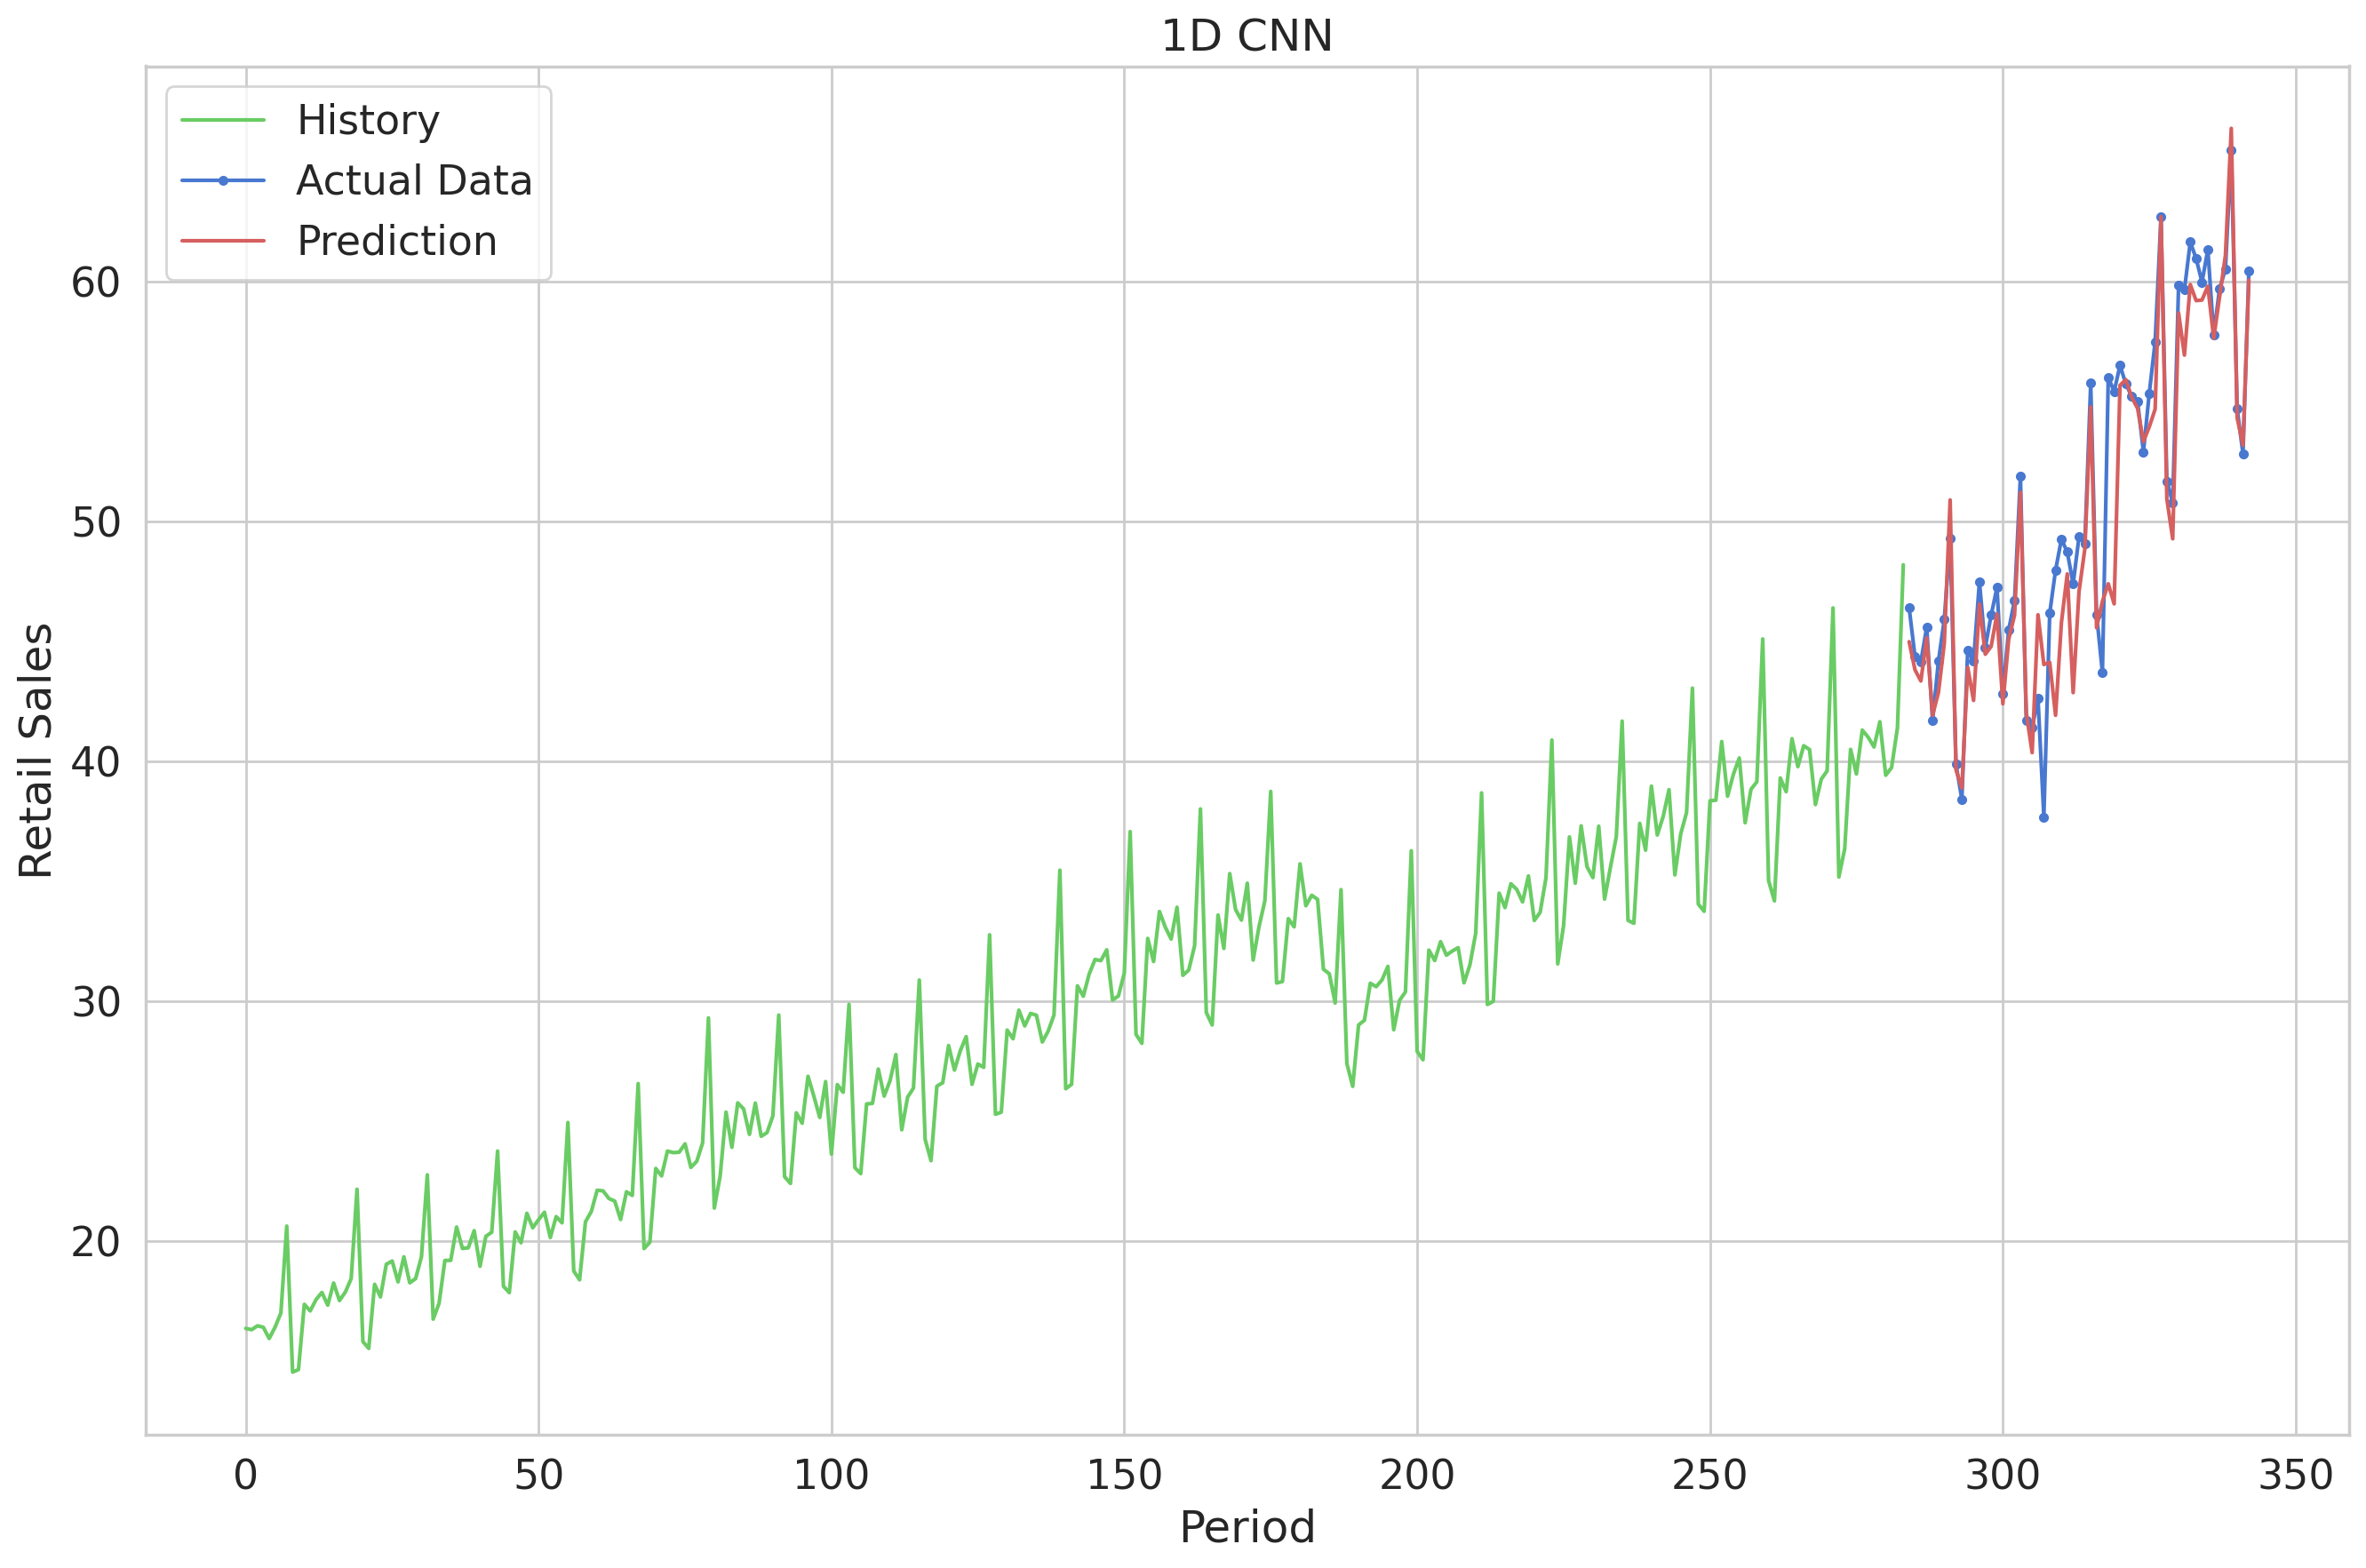

In [51]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="History")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="Actual Data")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred1, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.title('1D CNN')
plt.legend()
plt.show();

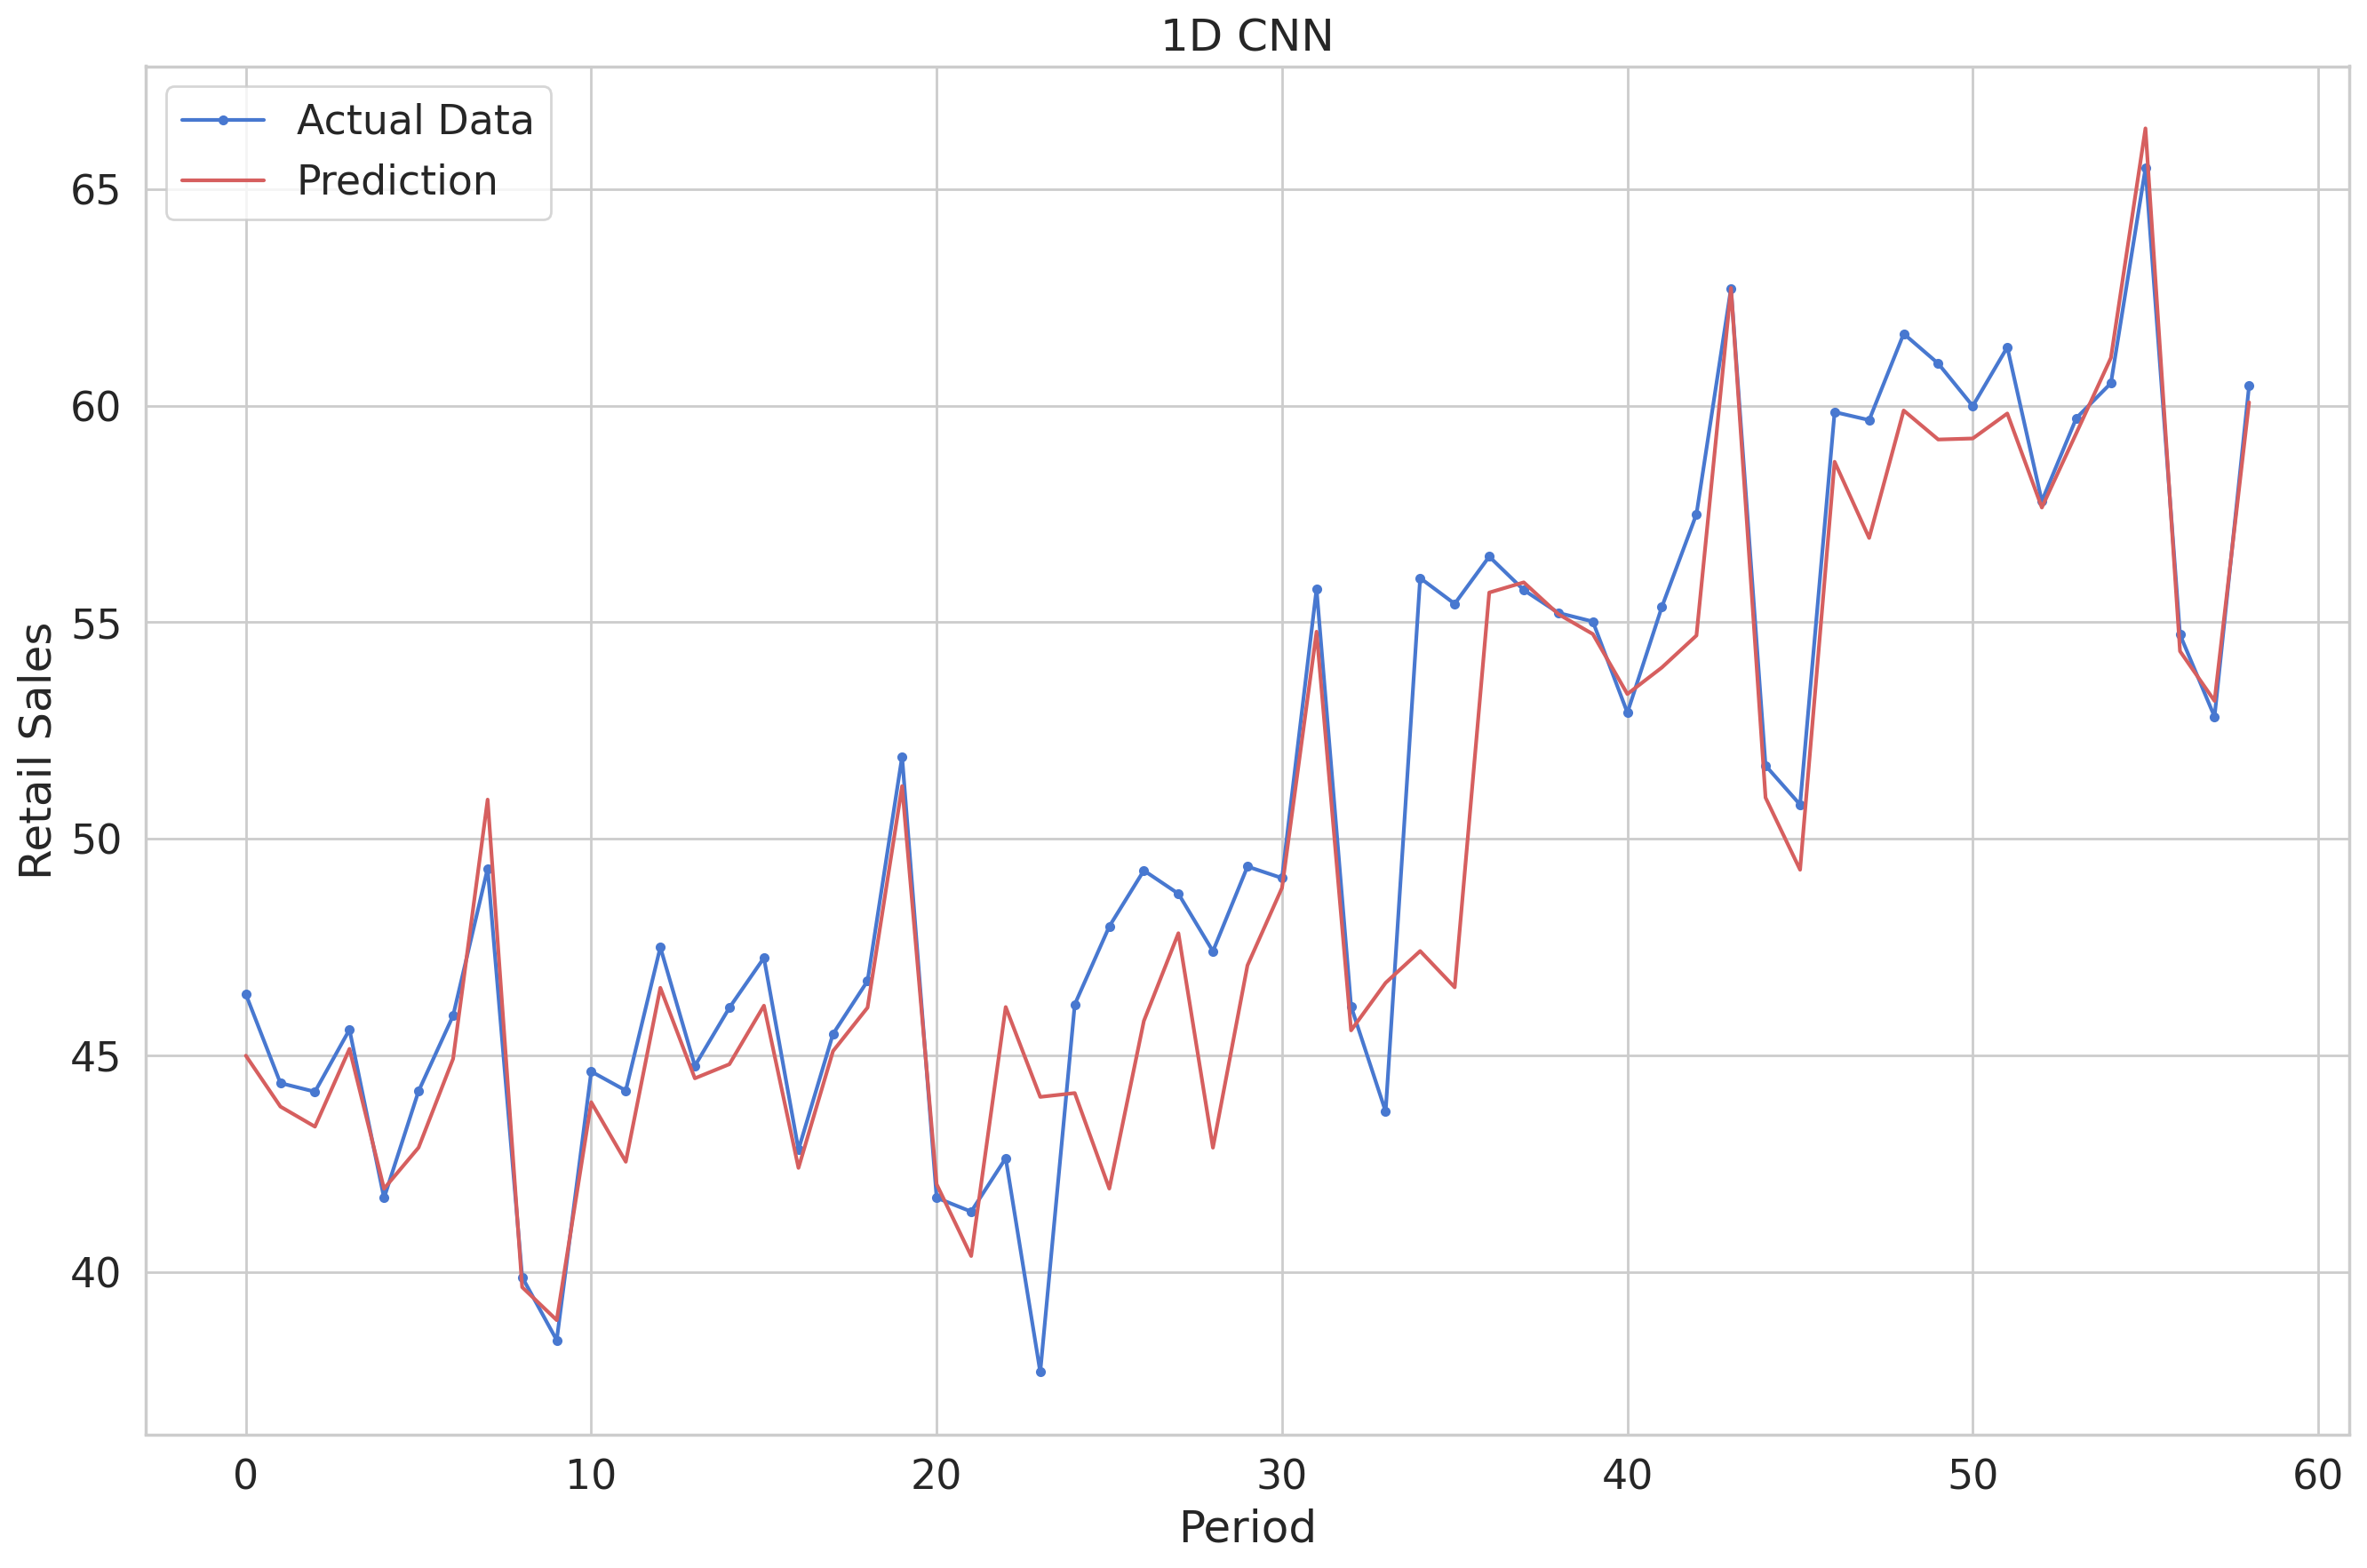

In [52]:
plt.plot(y_test, marker='.', label="Actual Data")
plt.plot(y_pred1, 'r', label="Prediction")
plt.ylabel('Retail Sales')
plt.xlabel('Period')
plt.title('1D CNN')
plt.legend()
plt.show();

## Test performance

In [55]:
# calculate the RMSE of model(MLP)
print(y_pred.shape)
print(y_test.shape)
RSS = 0
for i in range(y_pred.shape[0]):
  temp = (y_pred[i,0]-y_test[i,0])**2
  RSS += temp
MSE = RSS/y_pred.shape[0]
RMSE = np.sqrt(MSE)
print(RSS, MSE, RMSE)

(59, 1)
(59, 1)
440.1286510392289 7.459807644732693 2.7312648433889914


In [56]:
# calculate the RMSE of model(1D CNN)
print(y_pred1.shape)
print(y_test.shape)
RSS1 = 0
for i in range(y_pred1.shape[0]):
  temp = (y_pred1[i,0]-y_test[i,0])**2
  RSS1 += temp
MSE1 = RSS1/y_pred1.shape[0]
RMSE1 = np.sqrt(MSE1)
print(RSS1, MSE1, RMSE1)

(59, 1)
(59, 1)
346.1740169083737 5.867356218785995 2.4222626238263256


- MLP: RSS = 440.13, MSE = 7.46, RMSE = 2.73
- 1D CNN: RSS = 346.17, MSE = 5.87, RMSE = 2.42

Overall, the 1D CNN model has a lower RSS, MSE, and RMSE value, which indicate that 1D CNN model has a better performance in terms of prediction accuracy on this dataset. I deduced that the CNN is more sensitive in capturing the features and time dependency from the this dataset.